In [1]:
#Load necessary Libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# LOAD THE DATASET

In [2]:
# Load the dataset
df = pickle.load(open("MS_NM_vector_df.pickle", 'rb'))
df

,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,...,dim_291,dim_292,dim_293,dim_294,dim_295,dim_296,dim_297,dim_298,dim_299,dim_300
0,1.729217,0.245316,-0.493493,0.029268,0.330834,-0.764485,-0.530714,-0.918960,0.605372,1.213468,...,-0.622933,0.216431,0.466657,0.949482,-0.200474,-1.695715,-0.294176,0.174417,-0.316305,0.285695
1,1.803955,1.230895,-0.885640,-0.663181,-2.109583,-0.297170,-0.807866,-0.755965,-0.838983,3.226501,...,0.514852,-0.935095,0.911103,0.573316,0.113726,0.023391,0.583217,-0.030564,0.457275,-0.488943
2,0.574240,-0.458767,0.180953,-1.052859,-0.301949,-0.603319,-1.509269,-0.870443,0.345276,0.524611,...,-1.347703,-0.434989,-0.523450,-0.291855,-0.109767,-1.309015,-0.264903,0.005824,-0.194770,-0.770215
3,0.664584,-0.236720,-0.937665,1.754107,0.647106,1.376578,-0.491415,0.226166,-0.872299,0.856417,...,-0.242976,0.149754,0.343483,-0.014610,0.316516,-0.651860,1.285176,-0.571308,0.497994,-0.154224
4,1.173817,0.419200,0.460959,0.768683,-1.166203,-1.001240,-0.191754,-0.424820,-0.206357,1.059748,...,0.307194,1.019033,0.091227,0.459494,0.488245,-1.041828,0.107056,0.148993,-0.523627,0.504566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,0.063168,0.098319,0.253139,-0.488186,0.737574,0.541163,-1.570866,0.079295,-0.293344,-1.538060,...,2.005187,-2.112913,0.440736,0.454736,0.384735,0.517010,-0.670551,-1.266957,1.051938,1.919566
2529,0.454408,-0.138560,-0.331123,-0.163651,0.785148,-0.507341,-0.685291,1.182693,0.636671,-1.054161,...,0.313126,-0.151662,-0.036966,-0.610826,-2.254540,-0.605663,0.495140,0.387016,-0.085275,0.849042
2530,0.604914,0.645650,-1.623845,-1.116028,-0.501931,-0.593036,0.373793,-0.182061,-0.112844,-0.887427,...,1.739309,0.005688,0.287379,1.136948,-0.072742,-0.840421,-1.464063,-1.112515,3.272193,-3.896594
2531,0.565542,1.349277,-1.679448,-0.430178,0.034780,-0.638081,-2.262594,-0.220345,-0.099406,0.688833,...,0.418089,1.412563,-1.310003,-0.734481,0.181640,-0.124939,-0.247587,0.132718,1.044298,-1.157660


## Objective: To cluster the data using UMAPS
1. Use UMAPS to reduce the dimensionality of the data to 2 dimensions
2. Cluster the data
3. Embed Date information into the data
4. Plot the data giving each year a different color

In [3]:
%pip install umap

Note: you may need to restart the kernel to use updated packages.Collecting umap
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3551 sha256=d4d8f8f5ae47a8dd062035d2c1bfc4ee993a71b7c4a0a933bfd116ff43a1cb27
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\82\d8\73\e9eb3334baaad795ff0278363ff1aca7568bdf2793e452a527
Successfully built umap




[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install umap-learn

  Using cached umap-learn-0.5.3.tar.gz (88 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
                                              0.0/2.6 MB ? eta -:--:--
                                              0.0/2.6 MB 1.4 MB/s eta 0:00:02
     -                                        0.1/2.6 MB 991.0 kB/s eta 0:00:03
     -                                        0.1/2.6 MB 939.4 kB/s eta 0:00:03
     -                                        0.1/2.6 MB 722.1 kB/s eta 0:00:04
     --                                       0.1/2.6 MB 655.8 kB/s eta 0:00:04
     --                                       0.2/2.6 MB 655.4 kB/s eta 0:00:04
     ---                                      0.2/2.6 MB 622.7 kB/s eta 0:


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ------------------------------           20.9/27.7 MB 1.4 MB/s eta 0:00:05
     ------------------------------           21.0/27.7 MB 1.4 MB/s eta 0:00:05
     ------------------------------           21.0/27.7 MB 1.5 MB/s eta 0:00:05
     ------------------------------           21.1/27.7 MB 1.5 MB/s eta 0:00:05
     ------------------------------           21.1/27.7 MB 1.5 MB/s eta 0:00:05
     ------------------------------           21.1/27.7 MB 1.5 MB/s eta 0:00:05
     ------------------------------           21.2/27.7 MB 1.5 MB/s eta 0:00:05
     ------------------------------           21.2/27.7 MB 1.5 MB/s eta 0:00:05
     ------------------------------           21.3/27.7 MB 1.5 MB/s eta 0:00:05
     ------------------------------           21.3/27.7 MB 1.5 MB/s eta 0:00:05
     ------------------------------           21.4/27.7 MB 1.5 MB/s eta 0:00:05
     ------------------------------           21.4/27.7 MB 1.5 MB/s eta 0:00:05
     ------------------------------    

In [5]:
%pip install --upgrade pip

                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB 1.4 MB/s eta 0:00:02
     -                                        0.1/2.1 MB 1.1 MB/s eta 0:00:02
     --                                       0.1/2.1 MB 901.1 kB/s eta 0:00:03
     ---                                      0.2/2.1 MB 1.1 MB/s eta 0:00:02
     ---                                      0.2/2.1 MB 985.7 kB/s eta 0:00:02
     -----                                    0.3/2.1 MB 1.1 MB/s eta 0:00:02
     -------                                  0.4/2.1 MB 1.3 MB/s eta 0:00:02
     -----------                              0.6/2.1 MB 1.5 MB/s eta 0:00:01
     -------------                            0.7/2.1 MB 1.7 MB/s eta 0:00:01
     ---------------                          0.8/2.1 MB 1.8 MB/s eta 0:00:01
     ------------------                       0.9/2.1 MB 1.8 MB/s eta 0:00:01
     -------------------                      1.0/2.1 MB 1.8 MB/s e

In [3]:
%pip install --upgrade umap-learn


                                              0.0/88.2 kB ? eta -:--:--
     ---------------------------              61.4/88.2 kB 1.1 MB/s eta 0:00:01
     ---------------------------------------- 88.2/88.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
                                              0.0/2.6 MB ? eta -:--:--
     ---                                      0.2/2.6 MB 6.3 MB/s eta 0:00:01
     ---                                      0.2/2.6 MB 3.0 MB/s eta 0:00:01
     --------                                 0.5/2.6 MB 4.2 MB/s eta 0:00:01
     -------------                            0.8/2.6 MB 5.3 MB/s eta 0:00:01
     ------------------                       1.2/2.6 MB 5.9 MB/s eta 0:00:01
     ----------------------                   1.4/2.6 MB 6.0 MB/s eta 0:00:01
     -------------------------                1.6/2.6 MB 5.5 MB/s eta 0:00:01
     ------------------------------           1.9

In [3]:
from umap import UMAP

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\si

### Dimensionality Reduction | UMAPS


#### UMAP Model
The n_components parameter set to 2 to reduce the above dimensionality to 2 in order to get a 2-D plot.The random_state parameter allows you to control the randomness in code and ensure reproducibility to facilitate comparision.

#### Reducing dimensions to 2-D

In [4]:
# Load the UMAP model
umap_2 = UMAP(n_components=2, random_state=42)
umap_data_2 = umap_2.fit_transform(df)

In [5]:
umap_data_2.shape

(2533, 2)

In [6]:
# Create a DataFrame 'df_umap' using the UMAP transformed data 'umap_data'
# Set the column names of 'df_umap' as ['x', 'y']
df_umap_2 = pd.DataFrame(umap_data_2, columns=['x', 'y'])

# The resulting DataFrame 'df_umap' contains the UMAP transformed data with columns 'x' and 'y'
df_umap_2


,x,y
0,0.965321,9.223312
1,4.396095,7.197425
2,4.704985,7.830008
3,3.932616,7.069750
4,0.138507,9.010196
...,...,...
2528,2.052044,8.872194
2529,2.768818,9.272061
2530,2.482742,7.692467
2531,1.993481,8.093008


In [43]:
df_umap_2D = open("df_umap_2D.pickle", "wb")
pickle.dump(df_umap_2, df_umap_2D)
df_umap_2D.close()

### Plot the UMAP Model

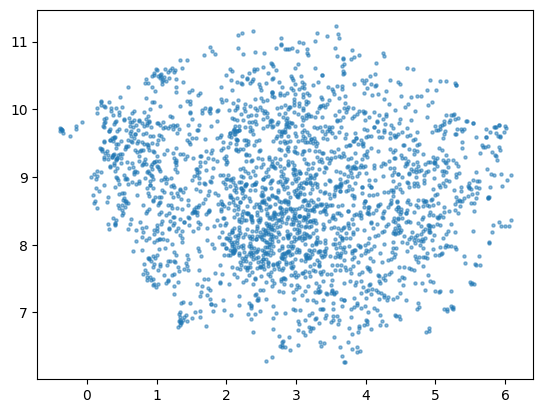

In [7]:
# Create a scatter plot using the 'x' and 'y' columns from the DataFrame 'df_umap'
# Set the marker size to 5, and the transparency (alpha) to 0.5
plt.scatter(df_umap_2['x'], df_umap_2['y'], s=5, alpha=0.5)

# Display the plot
plt.show()

# K-Means Clustering 
It is a popular unsupervised Ml model used for clustering data points into groups based on their similarity. It partitions the data into K clusters where each data point belongs to the cluster with nearest mean.

In [8]:
# import the KMeans model
from sklearn.cluster import KMeans

We idealy want clusters for each year.
We will use the elbow method to determine the number of clusters
Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset. It is a heuristic method to estimate the optimal number of clusters in a data set given by the sum of squared errors (SSE) within clusters.

### No. of clusters using Elbow Method

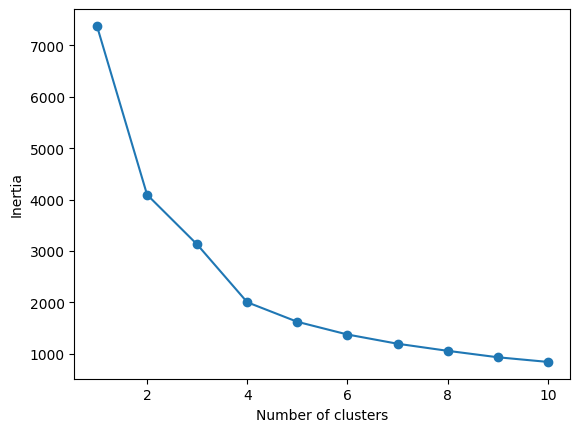

In [9]:
# Find the optimal number of clusters in df_umap using the elbow method
# Create a list of inertia values
inertia = []
for i in range(1, 11):
    # Create a KMeans instance with i clusters: model
    model = KMeans(n_clusters=i, random_state=42, n_init='auto')

    # Fit model to samples
    model.fit(df_umap_2)

    # Append the inertia to the list of inertia
    inertia.append(model.inertia_)

# Plot the inertia vs number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Here a decrease in the SSE is observed as the number of clusters increases. The point where the SSE curve starts to bend is considered as the optimal number of clusters. 
In the plot below, the elbow is at k=5 indicating the optimal k for this dataset is 5.

## Plot the UMAP Model

In [16]:
import plotly.express as px

# Set the 'z' column values to 1 for rows up to index 1351
df_umap_2.loc[:1351, 'PM'] = 'Manmohan Singh'

# Set the 'z' column values to 2 for rows starting from index 1351
df_umap_2.loc[1351:, 'PM'] = 'Narendra Modi'

fig = px.scatter(
    df_umap_2,  # DataFrame containing the data
    x='x',          # Column name for the x-axis values
    y='y',          # Column name for the y-axis values
    color='PM',     # Column name for assigning colors based on cluster
    size_max=10,
    color_discrete_sequence = ['maroon', 'blue']          
)

# Customize the layout of the figure
fig.update_layout(
    height=800,  # Set the height of the figure
    width=1000   # Set the width of the figure
)

# Display the plot
fig.show()


NM speeches are not diversified whereas MS speeches are quite diversified (quantify that) -> information theory algo -> entropy 

In [10]:
# Create a KMeans instance with 5 clusters
model = KMeans(n_clusters=5, random_state=42)
# Fit model to df_umap
model.fit(df_umap_2)  # Assuming 'x' and 'y' are the UMAP coordinates

# Create separate DataFrames for person 1 and person 2
#person1_df = df_umap[df_umap['z'] == 1.0]
#person2_df = df_umap[df_umap['z'] == 2.0]

# Assign different colors or markers to person 1 and person 2
#person1_color = 'red'
#person2_color = 'blue'
#person1_marker = 'o'
#person2_marker = 's'

# Plot the data points with different colors or markers for each person
#plt.scatter(person1_df['x'], person1_df['y'], c=person1_color, marker=person1_marker, label='Manmohan Singh', s=5)
#plt.scatter(person2_df['x'], person2_df['y'], c=person2_color, marker=person2_marker, label='Narendra Modi', s=5)
#plt.legend()

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='2d')

# Plot the cluster centers
ax.scatter(df_umap['x'], df_umap['y'],c=model.labels_, s=5, alpha=0.5)

# Add labels and a legend
ax.set_xlabel('UMAP X')
ax.set_ylabel('UMAP Y')
ax.legend()

# Show the plot
plt.show()


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: Unknown projection '2d'

<Figure size 640x480 with 0 Axes>

In [17]:
# Load the pickled object from "0.META.pickle" file
meta_df = pickle.load(open("0.META.pickle", 'rb'))

In [18]:
meta_df

,index,Date,Title,Speech,Cleaned_Speech,Cleaned_Speech_string
0,MSS1,2004-06-24,Prime Minister 's Address to the Nation,"My Fellow Citizens,I speak to you with a deep...",['fellow citizen speak deep sense humility ful...,fellow citizen speak deep sense humility fully...
1,MSS2,2004-06-29,PM's inaugural address at the Chief Ministers'...,"""I welcome you all to this Conference which w...",['welcome conference take stock effort rural d...,welcome conference take stock effort rural dev...
2,MSS3,2004-07-03,"PM's inaugural address at the ""Dialogue on Min...","""It gives me great pleasure to be amongst you...","['give great pleasure amongst morning', 'parti...",give great pleasure amongst morning particular...
3,MSS4,2004-07-26,PM's speech at the CSIR Society Meeting,"Distinguished Members of the CSIR Society, La...",['distinguished member csir society lady gentl...,distinguished member csir society lady gentlem...
4,MSS5,2004-07-31,PM’ statement at the Press Conference,"\n\t""My two days in Bangkok have been very use...","['two day bangkok useful productive', 'first b...",two day bangkok useful productive first bimste...
...,...,...,...,...,...,...
2528,NMS1178,2023-04-09,English rendering of PM’s address at the inaug...,My colleagues in the Union Cabinet Shri Bhupen...,['colleague union cabinet shri bhupender yadav...,colleague union cabinet shri bhupender yadav j...
2529,NMS1179,2023-04-12,English rendering of PM’s address at training ...,Namaskar! \n\nThe campaign to provide governme...,"['namaskar', 'campaign provide government job ...",namaskar campaign provide government job youth...
2530,NMS1180,2023-04-12,English rendering of PM’s address during flagg...,"Namaskar, Governor of Rajasthan Shri Kalraj Mi...",['namaskar governor rajasthan shri kalraj mish...,namaskar governor rajasthan shri kalraj mishra...
2531,NMS1181,2023-04-14,English rendering of PM’s address at inaugurat...,"Governor of Assam Shri Gulab Chand Kataria ji,...",['governor assam shri gulab chand kataria ji c...,governor assam shri gulab chand kataria ji chi...


In [20]:
# Embed the date column into the UMAP model, create a new dataframe
df_dim_date = pd.concat([df_umap_2, meta_df['Date']], axis=1)

# Only keep the year in the date column, date is in string, in lambda function, convert it to datetime, and then extract the year
df_dim_date['Date'] = df_dim_date['Date'].apply(lambda x: pd.to_datetime(x).year)

# Delete the entry with year nan
df_dim_date = df_dim_date[df_dim_date['Date'] != 'nan']

# Append the cluster label to the dataframe of df_dim_date and umap 
df_dim_date['cluster'] = model.labels_

df_dim_date = pd.concat([meta_df['index'], df_dim_date], axis = 1)

df_dim_date['cluster'] = df_dim_date['cluster'].apply(lambda x: f"C{x}")

In [21]:
df_dim_date

,index,x,y,PM,Date,cluster
0,MSS1,0.965321,9.223312,Manmohan Singh,2004,C0
1,MSS2,4.396095,7.197425,Manmohan Singh,2004,C2
2,MSS3,4.704985,7.830008,Manmohan Singh,2004,C2
3,MSS4,3.932616,7.069750,Manmohan Singh,2004,C2
4,MSS5,0.138507,9.010196,Manmohan Singh,2004,C0
...,...,...,...,...,...,...
2528,NMS1178,2.052044,8.872194,Narendra Modi,2023,C4
2529,NMS1179,2.768818,9.272061,Narendra Modi,2023,C1
2530,NMS1180,2.482742,7.692467,Narendra Modi,2023,C4
2531,NMS1181,1.993481,8.093008,Narendra Modi,2023,C4


In [70]:
# Print unique years
df_dim_date['Date'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [87]:
df_dim_date.shape

(2533, 5)

## Plot the clusters


In [26]:
# Create a 3D scatter plot using Plotly Express
fig_1 = px.scatter(
    df_dim_date,  # DataFrame containing the data
    x='x',          # Column name for the x-axis values
    y='y',          # Column name for the y-axis values
    color='cluster',     # Column name for assigning colors based on cluster
    hover_data='index',  # Column name for additional information on hover
    size_max=10,         # Maximum size of the markers
    symbol = 'PM',
    color_discrete_map = {'C0':'pink', 'C1':'royalblue', 'C2':'darkturquoise', 'C3':'maroon', 'C4': 'orange'}          
)

# Customize the layout of the figure
fig_1.update_layout(
    height=800,  # Set the height of the figure
    width=1000   # Set the width of the figure
)

# Display the plot
fig_1.show()


In [28]:
# Store the dataframe to csv file
df_dim_date.to_csv("E:\Tarang\Ashoka\Python\PYTHON PROJECT\df_umap_2.csv", index = False)

### Presidency-wise visualization

In [29]:
df_dim_date

,index,x,y,PM,Date,cluster
0,MSS1,0.965321,9.223312,Manmohan Singh,2004,C0
1,MSS2,4.396095,7.197425,Manmohan Singh,2004,C2
2,MSS3,4.704985,7.830008,Manmohan Singh,2004,C2
3,MSS4,3.932616,7.069750,Manmohan Singh,2004,C2
4,MSS5,0.138507,9.010196,Manmohan Singh,2004,C0
...,...,...,...,...,...,...
2528,NMS1178,2.052044,8.872194,Narendra Modi,2023,C4
2529,NMS1179,2.768818,9.272061,Narendra Modi,2023,C1
2530,NMS1180,2.482742,7.692467,Narendra Modi,2023,C4
2531,NMS1181,1.993481,8.093008,Narendra Modi,2023,C4


In [42]:
year_mapping = {2004: 'Year 1', 2005: 'Year 2', 2006: 'Year 3',2007: 'Year 4',2008: 'Year 5',2009: 'Year 6',2010: 'Year 7',2011: 'Year 8',2012: 'Year 9',2013: 'Year 10',2014: 'Year 11', 2017: 'Year 4',2018: 'Year 5',2019: 'Year 6',2020: 'Year 7',2021: 'Year 8',2022: 'Year 9', 2023: 'Year 10'}
df_dim_date['Year'] = df_dim_date['Date'].map(year_mapping)
df_dim_date

,index,x,y,PM,Date,cluster,Year
0,MSS1,0.965321,9.223312,Manmohan Singh,2004,C0,Year 1
1,MSS2,4.396095,7.197425,Manmohan Singh,2004,C2,Year 1
2,MSS3,4.704985,7.830008,Manmohan Singh,2004,C2,Year 1
3,MSS4,3.932616,7.069750,Manmohan Singh,2004,C2,Year 1
4,MSS5,0.138507,9.010196,Manmohan Singh,2004,C0,Year 1
...,...,...,...,...,...,...,...
2528,NMS1178,2.052044,8.872194,Narendra Modi,2023,C4,Year 10
2529,NMS1179,2.768818,9.272061,Narendra Modi,2023,C1,Year 10
2530,NMS1180,2.482742,7.692467,Narendra Modi,2023,C4,Year 10
2531,NMS1181,1.993481,8.093008,Narendra Modi,2023,C4,Year 10


In [58]:
import plotly.express as px
fig = px.scatter(df_dim_date, x='x', y='y', color='cluster', symbol = 'PM', color_discrete_map = {'CO':'pink', 'C1':'royalblue', 'C2':'darkturquoise', 'C3':'maroon', 'C4': 'grey'}, 
                facet_col='Year', facet_col_wrap=3, size_max = 12, hover_data = 'index')

fig.update_layout(height=800, width=1000)
fig.show() 

In [61]:
import plotly.express as px

fig = px.scatter(df_dim_date, x='x', y='y', color='cluster', symbol='PM',
                 color_discrete_map={'CO': 'pink', 'C1': 'royalblue', 'C2': 'darkturquoise', 'C3': 'maroon', 'C4': 'grey'},
                 facet_row='PM', facet_col='Year', size_max=12, hover_data='index')

# Adjust the aspect ratio of each subplot
fig.update_layout(
    height=600,
    width=2000,
    autosize=False,
    scene=dict(
        aspectmode='cube',
        aspectratio=dict(x=1, y=1, z=1)
    )
)
fig.update_xaxes(matches=None)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()


In [90]:
cluster_df= pd.concat([meta_df,df_dim_date['cluster']], axis=1)

In [91]:
cluster_df

,index,Date,Title,Speech,Cleaned_Speech,Cleaned_Speech_string,cluster
0,MSS1,2004-06-24,Prime Minister 's Address to the Nation,"My Fellow Citizens,I speak to you with a deep...",['fellow citizen speak deep sense humility ful...,fellow citizen speak deep sense humility fully...,3
1,MSS2,2004-06-29,PM's inaugural address at the Chief Ministers'...,"""I welcome you all to this Conference which w...",['welcome conference take stock effort rural d...,welcome conference take stock effort rural dev...,1
2,MSS3,2004-07-03,"PM's inaugural address at the ""Dialogue on Min...","""It gives me great pleasure to be amongst you...","['give great pleasure amongst morning', 'parti...",give great pleasure amongst morning particular...,1
3,MSS4,2004-07-26,PM's speech at the CSIR Society Meeting,"Distinguished Members of the CSIR Society, La...",['distinguished member csir society lady gentl...,distinguished member csir society lady gentlem...,4
4,MSS5,2004-07-31,PM’ statement at the Press Conference,"\n\t""My two days in Bangkok have been very use...","['two day bangkok useful productive', 'first b...",two day bangkok useful productive first bimste...,3
...,...,...,...,...,...,...,...
2528,NMS1178,2023-04-09,English rendering of PM’s address at the inaug...,My colleagues in the Union Cabinet Shri Bhupen...,['colleague union cabinet shri bhupender yadav...,colleague union cabinet shri bhupender yadav j...,0
2529,NMS1179,2023-04-12,English rendering of PM’s address at training ...,Namaskar! \n\nThe campaign to provide governme...,"['namaskar', 'campaign provide government job ...",namaskar campaign provide government job youth...,4
2530,NMS1180,2023-04-12,English rendering of PM’s address during flagg...,"Namaskar, Governor of Rajasthan Shri Kalraj Mi...",['namaskar governor rajasthan shri kalraj mish...,namaskar governor rajasthan shri kalraj mishra...,4
2531,NMS1181,2023-04-14,English rendering of PM’s address at inaugurat...,"Governor of Assam Shri Gulab Chand Kataria ji,...",['governor assam shri gulab chand kataria ji c...,governor assam shri gulab chand kataria ji chi...,3


In [80]:
df_sorted = cluster_df.sort_values(by='cluster')
df_sorted

,index,Date,Title,Speech,Cleaned_Speech,Cleaned_Speech_string,cluster
0,MSS1,2004-06-24,Prime Minister 's Address to the Nation,"My Fellow Citizens,I speak to you with a deep...",['fellow citizen speak deep sense humility ful...,fellow citizen speak deep sense humility fully...,0
580,MSS596,2007-11-19,PM's statement on the eve of departure to Sing...,I will be visiting Singapore from November 20t...,['visiting singapore november 20th 21st 2007 a...,visiting singapore november 20th 21st 2007 att...,0
1463,NMS113,2018-02-25,"Text of PM's address at Auroville, Puducherry",I am happy to be here today on the occasion of...,['happy today occasion golden jubilee week aur...,happy today occasion golden jubilee week aurov...,0
1465,NMS115,2018-02-27,Text of PM’s speech at India-Korea Business Su...,"Minister of Trade, Industry and Energy of the ...",['minister trade industry energy republic kore...,minister trade industry energy republic korea ...,0
1469,NMS119,2018-03-10,English rendering of the Press Statement by Pr...,"My friend, Macron, the President of France,Res...",['friend macron president france respected mem...,friend macron president france respected membe...,0
...,...,...,...,...,...,...,...
2014,NMS664,2021-04-22,Address by Prime Minister at the Leaders’ Summ...,"Your Excellency President Biden,\nDistinguishe...",['excellency president biden distinguished col...,excellency president biden distinguished colle...,4
2020,NMS670,2021-05-21,English rendering of PM's interaction with doc...,Har Har Mahadev!I have been in constant touch ...,['har har mahadev constant touch taking input ...,har har mahadev constant touch taking input ge...,4
1080,MSS1124,2012-02-02,PM's address at the12th Delhi Sustainable Deve...,“I am delighted to be here today at this inaug...,['delighted today inaugural session delhi sust...,delighted today inaugural session delhi sustai...,4
2065,NMS715,2021-08-28,English rendering of PM's speech after dedicat...,Joining the event are Governor of Punjab Shri ...,['joining event governor punjab shri v p singh...,joining event governor punjab shri v p singh b...,4


In [48]:
cluster_sorted = open("cluster_sorted.pickle", "wb")
pickle.dump(df_sorted, cluster_sorted )
cluster_sorted.close()

In [49]:
df_sorted.to_csv('output.csv')